# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [3]:
websites = pd.read_csv('website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like? 
like a pandas dataset, 
1781 rows × 21 columns
* What are the data types? 
object, float, int
* Which columns contain the features of the websites? 
URL	URL_LENGTH	NUMBER_SPECIAL_CHARACTERS	CHARSET	
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
type column , 0, 1
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?
yes, char set, server WHOIS_COUNTRY	WHOIS_STATEPRO

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [10]:
# Your code here
display(websites)
display(websites.shape)
display(websites.dtypes)


,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,194,16,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,3,186,0,0,0.0,1
1777,M4_41,198,17,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,2,124,0,0,0.0,1
1778,B0_162,201,34,utf-8,Apache/2.2.16 (Debian),8904.0,US,FL,15/02/1999 0:00,15/07/2015 0:00,...,2,6,6631,87,89,132181,6945,87,4.0,0
1779,B0_1152,234,34,ISO-8859-1,cloudflare-nginx,NaN,US,CA,1/04/1998 0:00,9/12/2016 0:00,...,0,0,0,0,0,0,0,0,0.0,0


(1781, 21)

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [22]:
# Your comment here
websites.isna().sum()


#col, content_length missing 812 na values, as this is half the dataset, these should be kept and replaced with median value
# DNS query time missing 1 value, relace with median

websites['CONTENT_LENGTH'].fillna(websites['CONTENT_LENGTH'].median(), inplace=True)

websites['DNS_QUERY_TIMES'].fillna(websites['DNS_QUERY_TIMES'].median(), inplace=True)

websites.duplicated().sum() # no duplicates thus proceed

#I think we want to keep the outliers in this data set


0

#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
URL_LENGTH,1.000000,0.917986,0.077795,-0.038407,-0.039839,-0.046367,-0.026446,-0.042264,-0.033779,-0.014857,-0.026686,-0.042264,-0.069215,0.162104
NUMBER_SPECIAL_CHARACTERS,0.917986,1.000000,0.127858,-0.037459,-0.042619,-0.047103,-0.023914,-0.040096,-0.030597,-0.014376,-0.024098,-0.040096,-0.050400,0.280897
CONTENT_LENGTH,0.077795,0.127858,1.000000,0.066708,-0.018212,0.010840,-0.001844,0.063213,0.073748,0.085547,-0.001932,0.063213,-0.024162,-0.070196
TCP_CONVERSATION_EXCHANGE,-0.038407,-0.037459,0.066708,1.000000,0.555188,0.331080,0.457320,0.997796,0.990848,0.865580,0.458702,0.997796,0.349895,-0.040202
DIST_REMOTE_TCP_PORT,-0.039839,-0.042619,-0.018212,0.555188,1.000000,0.210188,0.780238,0.558612,0.591188,0.313359,0.781212,0.558612,0.259966,-0.082925
REMOTE_IPS,-0.046367,-0.047103,0.010840,0.331080,0.210188,1.000000,0.023126,0.361104,0.304683,0.171651,0.025324,0.361104,0.548218,-0.078783
APP_BYTES,-0.026446,-0.023914,-0.001844,0.457320,0.780238,0.023126,1.000000,0.445822,0.468999,0.074464,0.999992,0.445822,0.012240,-0.011262
SOURCE_APP_PACKETS,-0.042264,-0.040096,0.063213,0.997796,0.558612,0.361104,0.445822,1.000000,0.989285,0.857495,0.447448,1.000000,0.410912,-0.034414
REMOTE_APP_PACKETS,-0.033779,-0.030597,0.073748,0.990848,0.591188,0.304683,0.468999,0.989285,1.000000,0.880555,0.470401,0.989285,0.355777,-0.032897
SOURCE_APP_BYTES,-0.014857,-0.014376,0.085547,0.865580,0.313359,0.171651,0.074464,0.857495,0.880555,1.000000,0.075328,0.857495,0.215342,-0.043852


'\nTCP_Conversion exchange and Source_APP_PACKETS\nTCP_Conversion exchange and REMOTE_APP_PACKETS\nAPP PACKETS and SOURCE APP PACKETS\nAPP PACKETS and REMOTE APP PACKETS\nAPP BYTES and REMOTE BYTES\n\n'

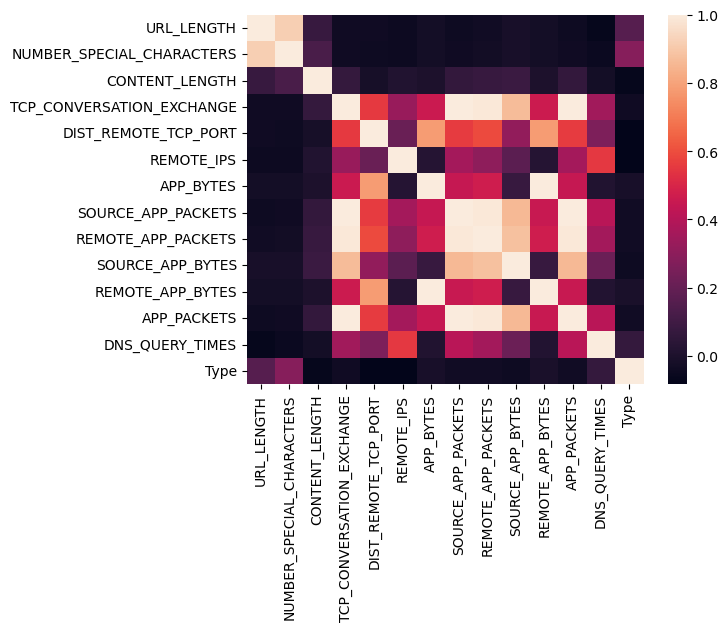

In [24]:
# Your code here

display(websites.select_dtypes(['int64', 'float64']).corr())
#to get just triangle shape map, ned to create a mask and apply it in the heatmap


In [ ]:
# Your comment here

import seaborn as sns
sns.heatmap(websites.select_dtypes(['int64', 'float64']).corr())

## 1:1 relationships between 
"""
TCP_Conversion exchange and Source_APP_PACKETS
TCP_Conversion exchange and REMOTE_APP_PACKETS
APP PACKETS and SOURCE APP PACKETS
APP PACKETS and REMOTE APP PACKETS
APP BYTES and REMOTE BYTES


only need one representant of the bytes and apps data, Thus keep APP BYTES and APP PACKETS and get rid of rest
"""


# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [34]:
# Your code here
## start with TCP_CONVERSATION EXCHANGE AS IS CORRELATED WITH MOST OTHER VARIABLES
#websites.drop(labels='TCP_CONVERSATION_EXCHANGE', axis=1, inplace=True)
## other obvious one is remote_app_bytes, keep app bytes
#websites.drop(labels='REMOTE_APP_BYTES', axis=1, inplace=True)
#websites.drop(labels='REMOTE_APP_PACKETS', axis=1, inplace=True)
websites.drop(labels='SOURCE_APP_PACKETS', axis=1, inplace=True)

<AxesSubplot: >

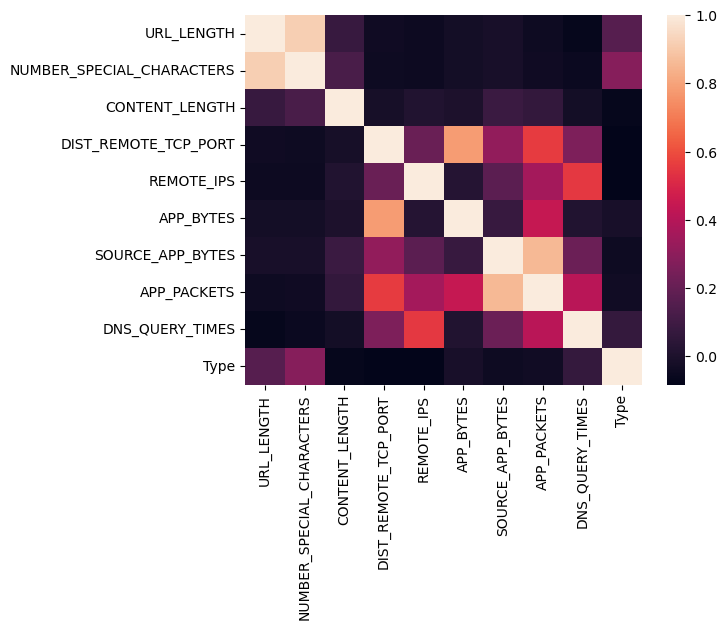

In [35]:
# Your comment here
sns.heatmap(websites.select_dtypes(['int64', 'float64']).corr())

In [ ]:
# Print heatmap again


# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [37]:
# Your code here

#col, content_length missing 812 na values, can thus drop columns

websites.drop(labels='CONTENT_LENGTH', axis=1 ,inplace=True)

#

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [40]:
# Your code here
#websites['DNS_QUERY_TIMES'].fillna(websites['DNS_QUERY_TIMES'].median(), inplace=True)
websites['SERVER'].fillna('None', inplace=True)

In [ ]:
# Your comment here
# DNS query time missing 1 value, relaced with median
# Server, oject data type, missing one item, replace with None


#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [41]:
# Examine missing values in each column
websites.isna().sum()
#good practice to find percentages of missing values

URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [52]:
# Your code here

websites['WHOIS_COUNTRY'].replace(to_replace=['GB', 'United Kingdom',  '[u\'GB\'; u\'UK\']'],  value='UK',inplace=True)
websites['WHOIS_COUNTRY'].replace(to_replace=['Cyprus'],  value='CY',inplace=True)
websites['WHOIS_COUNTRY'].str.upper()
display(websites['WHOIS_COUNTRY'].unique())

# can be replace aall in same line, using brackets in square brackets

array(['None', 'US', 'SC', 'UK', 'RU', 'AU', 'CA', 'PA', 'se', 'IN', 'LU',
       'TH', 'FR', 'NL', 'UG', 'JP', 'CN', 'SE', 'SI', 'IL', 'ru', 'KY',
       'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV', 'DE', 'ES', 'BR', 'us',
       'KR', 'HK', 'UA', 'CH', 'BS', 'PK', 'IT', 'CY', 'BY', 'AE', 'IE',
       'UY', 'KG'], dtype=object)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

<AxesSubplot: >

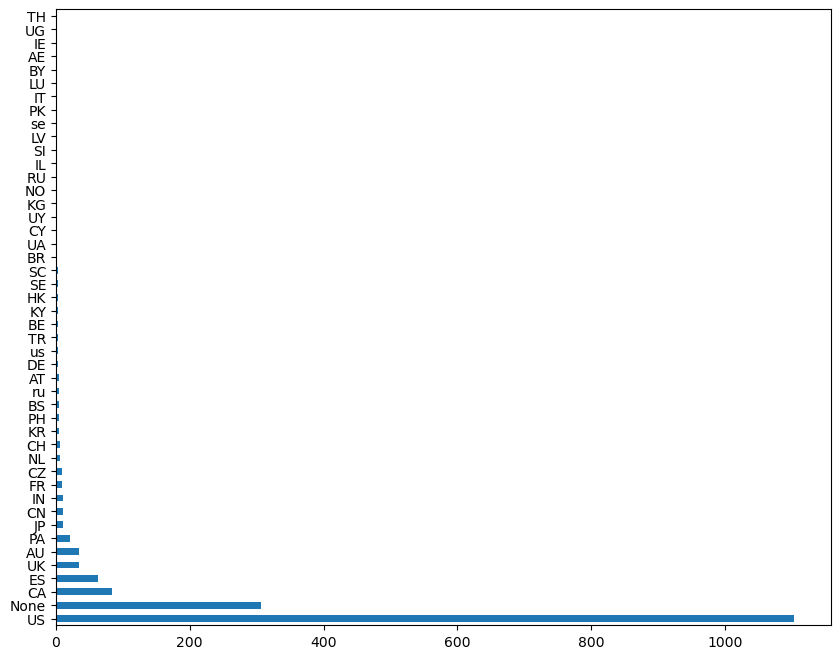

In [78]:
# Your code here
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
websites['WHOIS_COUNTRY'].value_counts().plot(kind='barh')


#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [96]:
# Your code here
# questioned whether None should be considered Other, but on relfexion, these are not the same as none is unknown, 
#whereas the countries for other are know
top_10=websites['WHOIS_COUNTRY'].value_counts().nlargest(10).index.tolist()

websites.loc[~websites['WHOIS_COUNTRY'].isin(top_10),['WHOIS_COUNTRY']]='OTHER'

#checking

websites.loc[websites['WHOIS_COUNTRY']=='OTHER']



,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
5,B0_2064,18,7,UTF-8,nginx,OTHER,Mahe,3/08/2016 14:30,3/10/2016 3:45,6,9,894,838,11,0.0,0
16,M0_97,21,7,iso-8859-1,nginx,OTHER,Novosibirskaya obl.,25/05/2013 0:00,23/05/2016 0:00,0,2,603,1580,8,2.0,1
30,B0_1185,23,6,us-ascii,Microsoft-HTTPAPI/2.0,OTHER,None,16/06/2000 0:00,18/05/2016 0:00,0,0,0,0,0,0.0,0
45,B0_108,24,6,utf-8,openresty,OTHER,None,7/01/2006 0:00,14/12/2016 0:00,54,5,10490,106925,96,12.0,0
64,B0_577,25,6,UTF-8,None,OTHER,bangkok,30/04/2010 14:12,12/03/2017 1:47,7,9,1586,1735,22,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,B0_877,112,19,ISO-8859-1,nginx,OTHER,California,10/09/1998 0:00,17/02/2016 0:00,0,0,0,0,0,0.0,0
1701,B0_690,114,18,ISO-8859-1,None,OTHER,Noord-Holland,8/02/1999 0:00,13/07/2014 0:00,47,11,6945,62932,71,12.0,0
1705,B0_1014,116,19,ISO-8859-1,None,OTHER,Paris,27/02/1995 0:00,28/01/2017 0:00,0,0,0,0,0,0.0,0
1733,B0_719,126,19,utf-8,Apache/2.4.17 (Unix) OpenSSL/1.0.1e-fips PHP/5...,OTHER,Zug,22/06/1998 0:00,20/05/2016 0:00,0,4,1368,3046,16,6.0,0


Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [ ]:
# Your code here
websites.drop(labels=['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], axis=1, inplace=True)

In [100]:
websites

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,None,0,2,700,1153,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,None,7,4,1230,1265,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,None,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,US,22,3,3812,18784,39,8.0,0
4,B0_403,17,6,UTF-8,None,US,2,5,4278,129889,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,194,16,UTF-8,Apache,ES,0,0,0,186,0,0.0,1
1777,M4_41,198,17,UTF-8,Apache,ES,0,0,0,124,0,0.0,1
1778,B0_162,201,34,utf-8,Apache/2.2.16 (Debian),US,2,6,6631,132181,87,4.0,0
1779,B0_1152,234,34,ISO-8859-1,cloudflare-nginx,US,0,0,0,0,0,0.0,0


# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [103]:
# Your code here
websites.dtypes


URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
WHOIS_COUNTRY                 object
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [106]:
# Your code here
websites.drop(labels='URL', axis=1,inplace=True)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [107]:
# Your code here
websites['CHARSET'].unique()

array(['iso-8859-1', 'UTF-8', 'us-ascii', 'ISO-8859-1', 'utf-8', 'None',
       'windows-1251', 'ISO-8859', 'windows-1252'], dtype=object)

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [123]:
# Your code here

#tidying up names, replacing those with servers versions with just main name, as dont nee this level of detail

#websites.loc[websites['SERVER'].str.contains('Apache',case=False ),'SERVER']='Apache'
#websites.loc[websites['SERVER'].str.contains('nginx',case=False ),'SERVER']='nginx'
#websites.loc[websites['SERVER'].str.contains('Microsoft',case=False ),'SERVER']='Microsoft'
websites.loc[websites['SERVER'].str.contains('Oracle',case=False ),'SERVER']='Oracle'
websites.loc[websites['SERVER'].str.contains('openresty',case=False ),'SERVER']='openresty'
websites.loc[websites['SERVER'].str.contains('codfw',case=False ),'SERVER']='codfw'



websites['SERVER'].unique()
 #pretty tiresome to relable all, and some clearly false so decision to relable all others OTHER  and just key top 10

#convert top10 to list    
top_10=websites['SERVER'].value_counts().nlargest(3).index.tolist()

websites.loc[~websites['SERVER'].isin(top_10), 'SERVER']= 'OTHER'

websites['SERVER'].unique()


array(['nginx', 'Apache', 'Microsoft', 'OTHER'], dtype=object)

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [ ]:
# Your code here


In [ ]:
# Count `SERVER` value counts here


OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [125]:
# Your code here
website_dummy= pd.get_dummies(data=websites,prefix={'SERVER': 'Ser_', 'CHARSET':'Char_','WHOIS_COUNTRY':'Who_'}, \
               columns=['SERVER', 'CHARSET','WHOIS_COUNTRY'])

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [128]:
# Your code here
website_dummy.dtypes

#no objects, all good to go

URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
Ser__Apache                    uint8
Ser__Microsoft                 uint8
Ser__OTHER                     uint8
Ser__nginx                     uint8
Char__ISO-8859                 uint8
Char__ISO-8859-1               uint8
Char__None                     uint8
Char__UTF-8                    uint8
Char__iso-8859-1               uint8
Char__us-ascii                 uint8
Char__utf-8                    uint8
Char__windows-1251             uint8
Char__windows-1252             uint8
Who__AU                        uint8
Who__CA                        uint8
Who__ES                        uint8
Who__IN                        uint8
Who__JP                        uint8
W

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [133]:
from sklearn.model_selection import train_test_split


Y=website_dummy['Type']
X=website_dummy.drop(labels='Type', axis=1)

# Your code here:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2,random_state=42)

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [153]:
# Your code here:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [144]:
# Your code here:
model=LogisticRegression()

trans=PowerTransformer()
#X_train_fit=trans.fit(X_train)
trans.fit(X_train)
X_train_model=trans.transform(X_train)
X_test_model=trans.transform(X_test)

model.fit(X_train_model, y_train)

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [[-2.72196369  2.96599207 -1.16407769 -0.02024629  0.45369129  1.29159321
  -1.57887269  1.17940231  0.11754768  0.55420067 -0.74167921  0.25298546
  -0.17920268  0.17986252 -0.24866083  0.23969997 -0.07936341 -0.47436722
  -0.0531343   0.1720136  -0.07095797 -0.39967103 -0.67040286  1.2322762
  -0.2657749  -0.1502146   0.10228091  0.18655873  0.04963453  0.01692758
  -0.17500587]]
Intercept: [-4.21686835]


finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

C:\Users\gemma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\gemma\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\gemma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\gemma\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:22

,Error_metric,Train,Test
0,Accuracy,0.884129,0.857143
1,Precision,0.000000,0.000000
2,Recall,0.000000,0.000000


C:\Users\gemma\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\gemma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\gemma\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

Confusion matrix for the train set
[[1259    0]
 [ 165    0]]


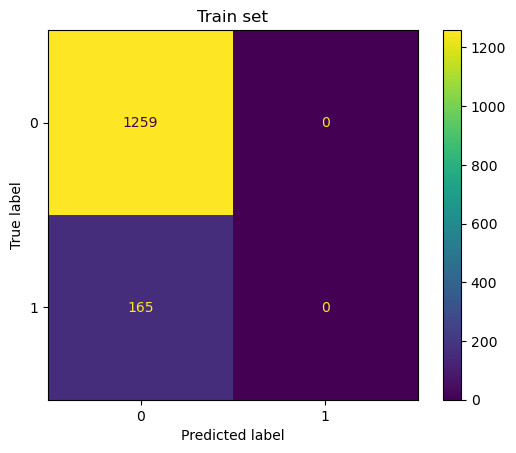



Confusion matrix for the test set
[[306   0]
 [ 51   0]]


C:\Users\gemma\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\gemma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\gemma\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

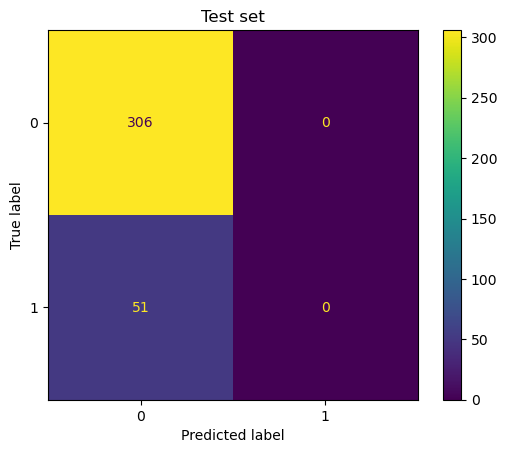

In [157]:
# Your code here:
y_pred_train_log = model.predict(X_train_model)
y_pred_test_log = model.predict(X_test_model)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(model,X_train_model,y_train, values_format = 'd')
plt.title('Train set')
plt.show()
print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(model,X_test_model,y_test, values_format = 'd')
plt.title('Test set')
plt.show()


What are your thoughts on the performance of the model? Write your conclusions below.

In [4]:
# Your conclusions here:

#not great, the predicted model only predicted 0 and no 1s, althought there are a majority of 0, and only 165 1s


#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [145]:
# Your code here:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3,weights='uniform') # declare we're using knn classification model
model.fit(X_train, y_train) # train model




KNeighborsClassifier(n_neighbors=3)

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [ ]:
# Your code here:
y_pred = model.predict(X_test) # predict test
y_pred_train=model.predict(X_train) # predict train (for sanity checks)
#model.predict_proba(inputdata)
y_pred
y_test

fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [159]:
def evaluate_classification_model(y_train, y_pred_train, y_test, y_pred_test):
    """
    Generates performance metrics and comparisons of labels with their predicted values
    :param y_train: training labels
    :param y_pred_train: predictions from the model on the training set
    :param y_test: test labels
    :param y_pred_test: predictions from the model on the test set
    :returns: 3 dfs - Accuracy, Precision, and Recall scores, y_train vs. y_pred_train and y_test vs. y_pred_dist
    """
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})
    
    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance_df, df_train, df_test

In [160]:
error_metrics_df,y_train_vs_predicted, y_test_vs_predicted =evaluate_classification_model(y_train, y_pred_train,y_test, y_pred)
error_metrics_df

,Error_metric,Train,Test
0,Accuracy,0.96,0.93
1,Precision,0.85,0.88
2,Recall,0.76,0.59


#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [161]:
# Your code here:

model = KNeighborsClassifier(n_neighbors=5,weights='uniform') # declare we're using knn classification model
model.fit(X_train, y_train) # train model

y_pred = model.predict(X_test) # predict test
y_pred_train=model.predict(X_train) # predict train (for sanity checks)
#model.predict_proba(inputdata)
y_pred
y_test
error_metrics_df,y_train_vs_predicted, y_test_vs_predicted =evaluate_classification_model(y_train, y_pred_train,y_test, y_pred)
error_metrics_df

C:\Users\gemma\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\gemma\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

,Error_metric,Train,Test
0,Accuracy,0.95,0.92
1,Precision,0.80,0.83
2,Recall,0.71,0.59


Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [8]:
# Your conclusions here:



#### Please implement decision tree, random forest, SVM and extra tree. Which model is better? 

,Error_metric,Train,Test
0,Accuracy,0.92,0.90
1,Precision,1.00,1.00
2,Recall,0.28,0.29


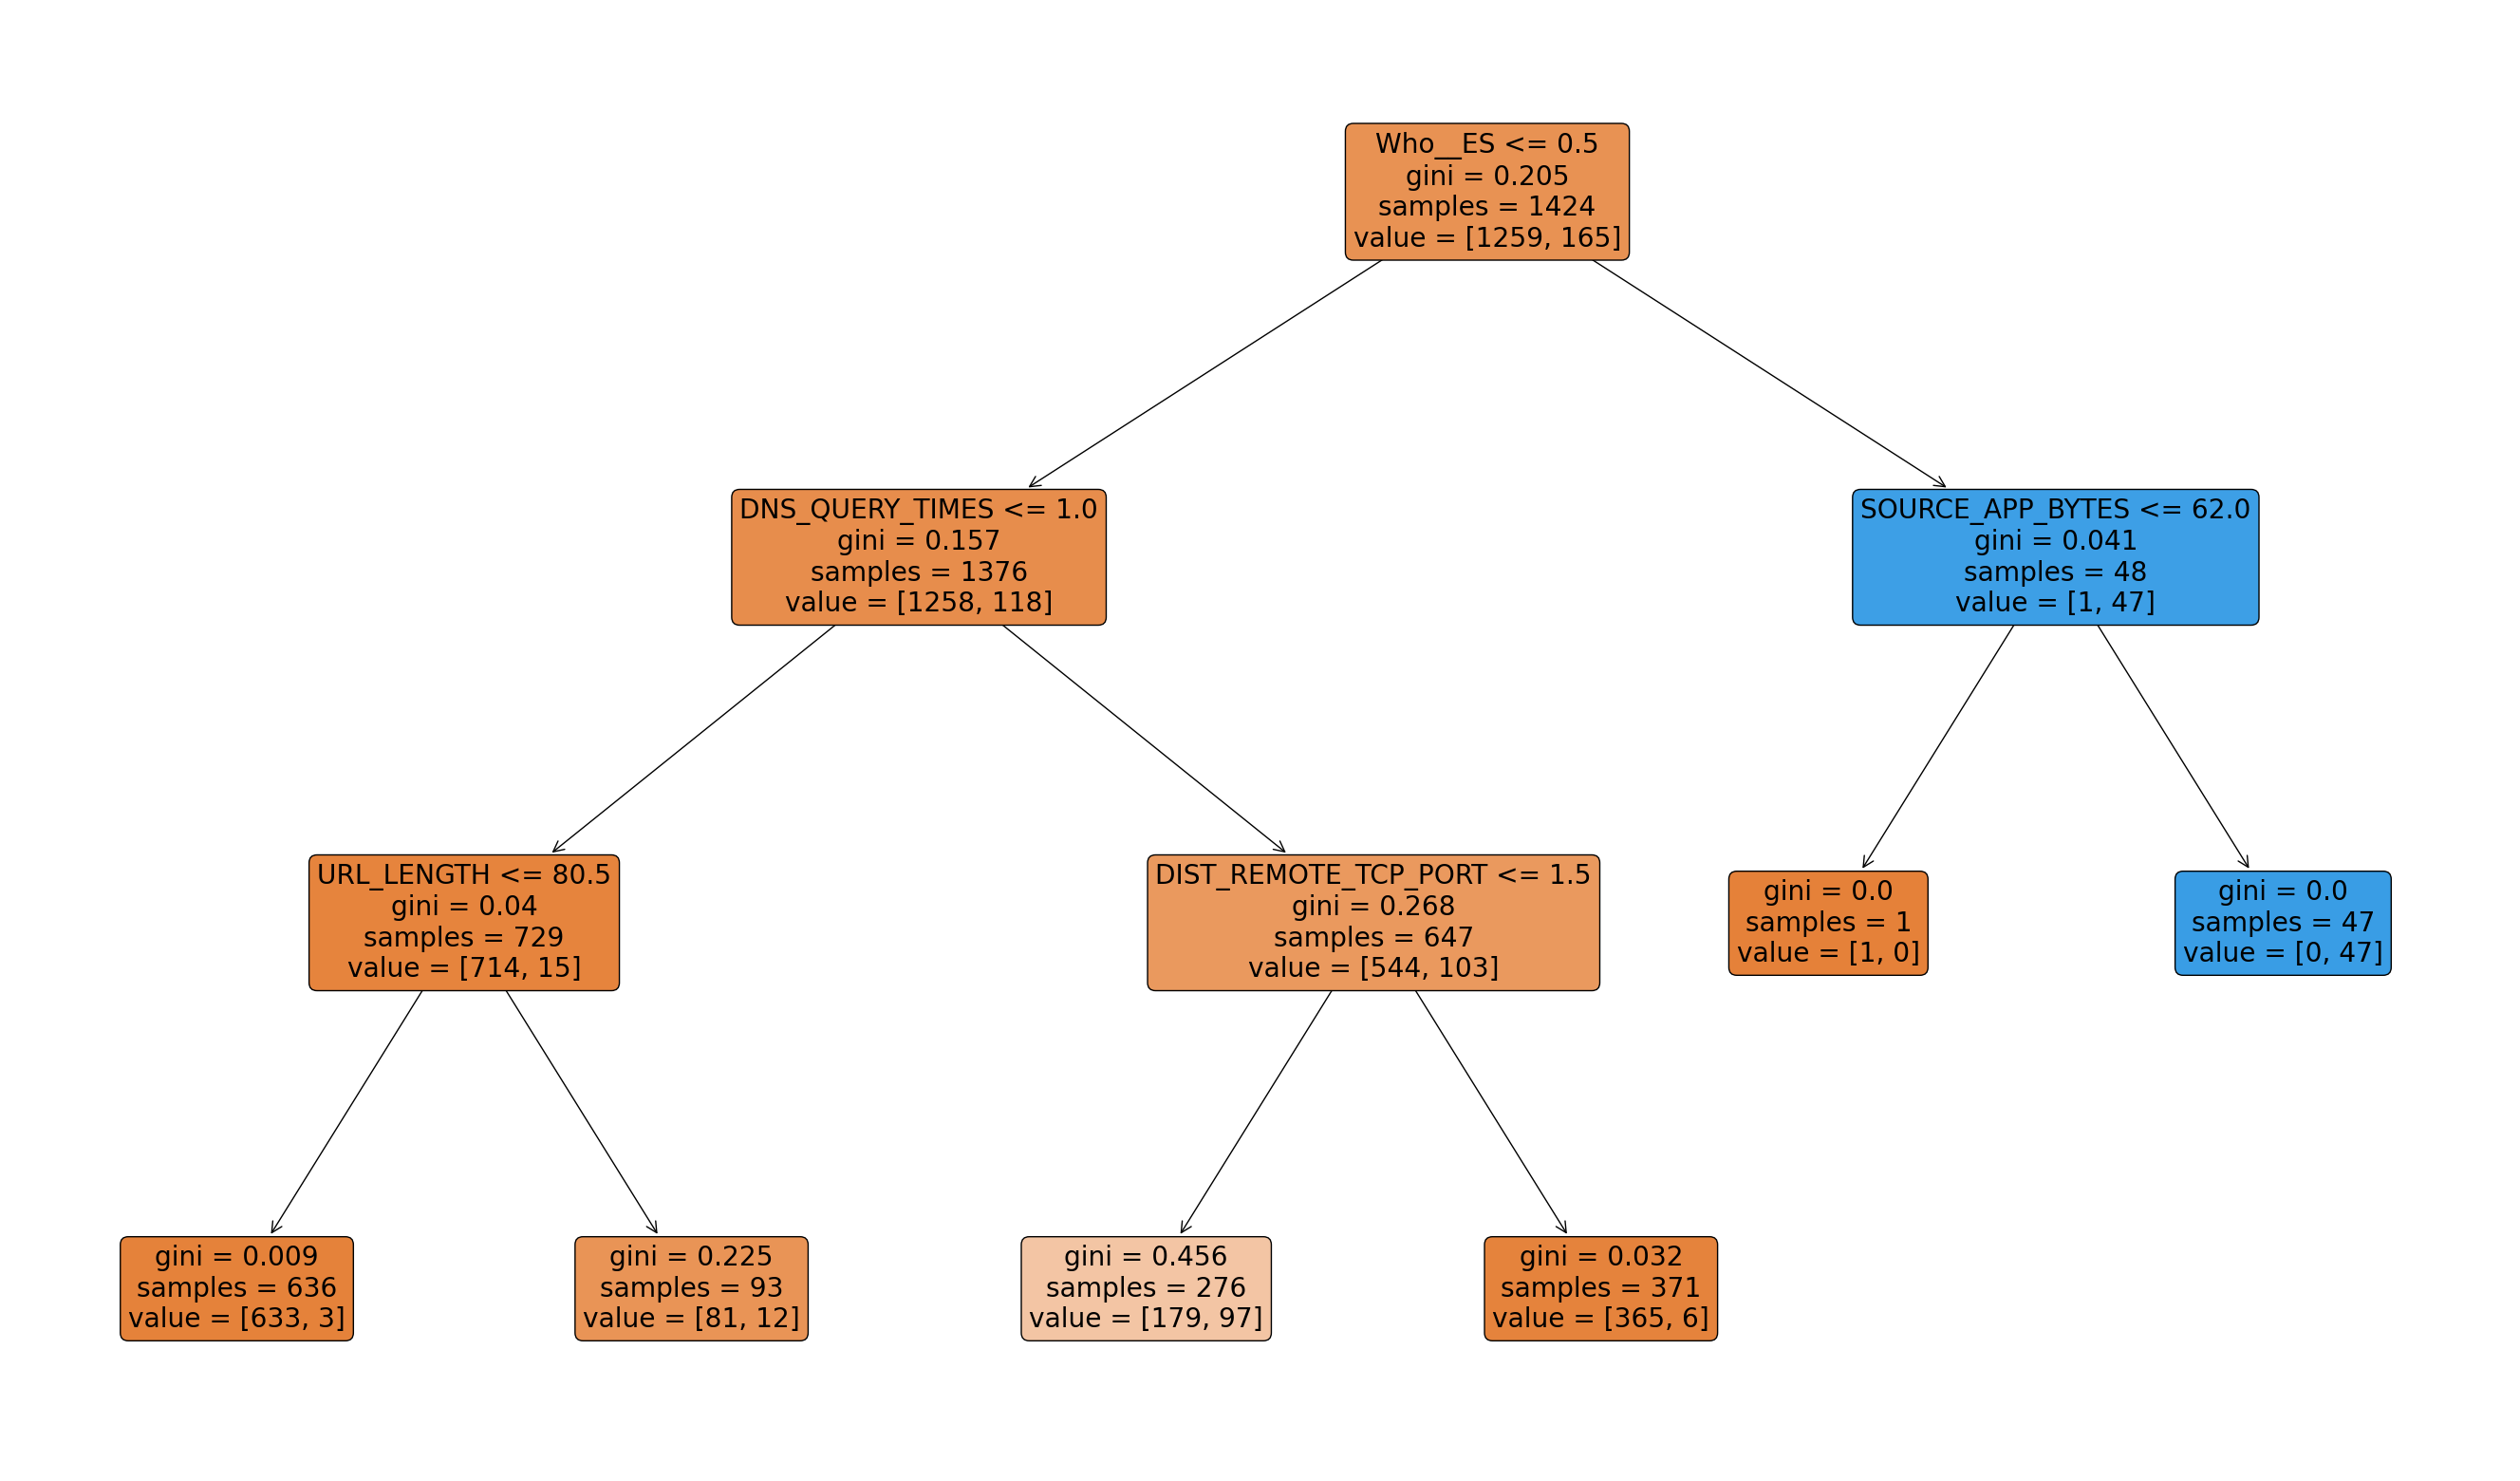

In [170]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

tree=DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)
y_pred_train=tree.predict(X_train)
y_pred_test=tree.predict(X_test)

performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})

display(performance_df)

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(tree,filled = True, rounded=True,feature_names=X.columns)
plt.show() 

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [ ]:
# Your code here